# Real-time Anomaly Detection in Financial Transactions

**Hongyi Zhang, Mengqi Liu**

## 1. Introduction

### 1.1. Executive Summary

The development of a real-time anomaly detection system for financial transactions holds significant potential to reshape decision-making frameworks within financial institutions, deliver substantial business value, and leverage robust data assets to achieve these outcomes. By integrating advanced machine learning techniques with real-time data processing capabilities, this system addresses critical challenges in fraud detection while paving the way for scalable applications across industries.

### 1.2. Decisions to Be Impacted

The proposed system directly influences strategic and operational decisions within financial institutions by providing real-time insights into transactional risks. One pivotal decision involves the instantaneous approval or interception of transactions based on dynamically calculated fraud risk scores. Traditional rule-based systems often result in high false-positive rates, leading to unnecessary transaction declines and customer dissatisfaction. By reducing false positives to below 10%, this system enables institutions to balance security with customer convenience, ensuring legitimate transactions proceed uninterrupted while high-risk activities are flagged for further scrutiny.

Operational efficiency is another critical area impacted by the system. Financial institutions often allocate substantial resources to manual fraud investigations, which are time-consuming and costly. The system prioritizes flagged transactions based on anomaly severity, allowing fraud teams to focus on high-probability cases. This optimization reduces operational workloads by an estimated 40-50%, freeing personnel to address strategic initiatives such as refining risk policies or enhancing customer engagement strategies. Furthermore, the system supports dynamic adjustments to risk management protocols. For instance, institutions can modify transaction limits or implement targeted verification steps for specific user segments based on real-time fraud patterns. These adaptive strategies ensure that risk mitigation evolves alongside emerging fraud tactics, maintaining robust defenses without compromising user experience.

Customer experience optimization emerges as a key decision area influenced by the system. Frequent false positives not only strain operational resources but also erode customer trust. By minimizing unnecessary declines, the system enhances customer satisfaction and retention—a critical competitive advantage in the financial sector. Institutions adopting this technology position themselves as leaders in both security and user-centric innovation, fostering long-term loyalty and market differentiation. Collectively, these decisions align with organizational objectives to reduce financial losses, comply with regulatory standards, and cultivate a reputation for reliability and technological advancement.

### 1.3. Business Value

The real-time anomaly detection system delivers immediate and transformative business value while laying the groundwork for future scalability. In the short term, financial institutions can expect a significant reduction in fraud-related losses. Initial projections based on model testing indicate that the system detects 85-90% of fraudulent transactions in real time, potentially reducing annual losses by up to 30%. This mitigation directly translates to improved profitability and resource allocation, enabling institutions to reinvest savings into customer-facing initiatives or technological upgrades.

Operational efficiency gains further amplify the system’s value. Automation of fraud detection processes reduces dependency on manual reviews, cutting operational costs and accelerating response times. For example, a transaction flagged as high-risk can trigger immediate actions such as temporary account freezes or enhanced authentication requests, preventing fraud before it escalates. These capabilities not only protect institutional assets but also ensure compliance with evolving regulatory requirements, mitigating legal risks and avoiding penalties associated with delayed fraud detection.

Looking ahead, the system’s adaptability ensures long-term relevance and cross-industry applicability. The framework’s modular design allows for seamless integration into sectors beyond finance. In healthcare, for instance, the system could detect anomalies in insurance claims or patient billing data, identifying fraudulent activities with similar efficiency. Cybersecurity represents another promising domain, where real-time anomaly detection could identify network intrusions or unauthorized access attempts. Such versatility underscores the system’s potential to address global challenges, particularly as digital transactions proliferate in emerging markets.

A key future enhancement is the integration of federated learning, a collaborative approach where institutions jointly improve fraud detection models without sharing sensitive data. For example, Bank A and Bank B could train a shared model using their own data, enhancing accuracy while preserving privacy. This creates a unified network against fraud, making it harder for criminals to exploit multiple platforms.

By adopting this system, institutions position themselves as innovators. Technologies like the Informer model with Time2Vec encoding (a method to analyze irregular transaction timestamps) demonstrate a commitment to cutting-edge solutions, attracting tech-savvy customers and partners. Over time, continuous improvements will ensure the system adapts to new fraud tactics and market needs.


### 1.4. Data Assets

The analytical foundation of this system is anchored in the IEEE-CIS Fraud Detection Dataset, a comprehensive resource co-developed by the IEEE Computational Intelligence Society and Vesta Corporation. This dataset combines transactional and identity data, offering a holistic view of user behavior and transactional patterns. Transactional records include timestamps, payment methods, transaction amounts, and device fingerprints, enabling granular time-series analysis to detect deviations from normal behavior. Identity data complements this with details such as IP addresses, browser types, and operating systems, which are instrumental in linking transactional anomalies to suspicious user activity.

The dataset’s structure supports advanced feature engineering, a cornerstone of the system’s efficacy. Temporal features, such as transaction frequency per user or time intervals between consecutive transactions, are engineered to capture behavioral nuances. Contextual metrics, including geolocation mismatches or sudden changes in device usage, further refine anomaly detection. To address high dimensionality, Autoencoders are employed to reduce feature complexity while preserving critical information, enhancing model interpretability and computational efficiency.

Model training and validation benefit from the dataset’s labeled transactions, which distinguish fraudulent from legitimate activities. Supervised learning techniques, applied to models like Isolation Forest and Informer, leverage these labels to predict fraud probabilities with high accuracy. Class imbalance, a common challenge in fraud detection, is mitigated through synthetic data generation and resampling strategies. These techniques ensure robust model performance across metrics such as Precision-Recall AUC and F1-score, which are critical for evaluating systems under imbalanced data conditions.

The dataset also facilitates real-world simulation of streaming data environments. By resampling historical transactions into real-time data streams, the system is rigorously tested for latency, accuracy, and scalability. This simulation validates its ability to process high-volume transactions with minimal delay, a prerequisite for deployment in live financial ecosystems. Additionally, the integration of Time2Vec encoding allows the system to handle irregular transaction intervals—a common challenge in real-world financial data—ensuring consistent performance across diverse scenarios.

Beyond immediate analytical applications, the dataset empowers institutions to adopt proactive fraud prevention strategies. Clustering algorithms applied to historical data identify high-risk user segments, enabling preemptive measures such as enhanced monitoring or customized authentication protocols. This proactive approach not only reduces fraud incidence but also builds institutional resilience against evolving threats. The dataset’s richness and versatility thus serve as a strategic asset, enabling continuous refinement of the system’s capabilities and fostering innovation in fraud detection methodologies.

By influencing critical decisions, delivering measurable business value, and leveraging a robust data infrastructure, the system addresses both immediate challenges and future opportunities. Its ability to reduce financial losses, optimize operations, and enhance customer trust positions as a vital tool for modern financial institutions. Continued research and development will further enhance its scalability, accuracy, and adaptability, ensuring its relevance in an increasingly digital and interconnected global economy. As the system evolves, its applications will expand beyond finance, contributing to broader societal efforts to combat fraud and safeguard digital ecosystems.

In [596]:
# System libraries
import os
import sys
import gc
import argparse  # Command-line argument parsing

# Numerical computation & data processing
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats  # Statistical functions

# Machine learning tools
import sklearn
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import StandardScaler  # Data normalization
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score  # Evaluation metrics
from sklearn.ensemble import IsolationForest  # Anomaly detection
from sklearn.neural_network import MLPRegressor  # Neural network regressor
from sklearn.covariance import EmpiricalCovariance  # Covariance estimation

# Anomaly detection library
import pyod
from pyod.models.hbos import HBOS  # Histogram-based anomaly detection

# Deep learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim  # Neural network training
import torch.nn.functional as F  # Neural network functions
from torch.utils.data import DataLoader, TensorDataset  # Data loader

# Deep learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense  # Keras layers
from tensorflow.keras.models import Model  # Keras model

# Time series forecasting
from informer import Informer  # Long sequence time-series forecasting model

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Statistical data visualization

In [537]:
gc.collect() # Garbage collection
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Device selection

In [538]:
# Print the version of the libraries
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)
print("Seaborn version: ", sns.__version__)
print("Scipy version: ", sp.__version__)
print("Scikit-learn version: ", sklearn.__version__)
print("PyOD version: ", pyod.__version__)
print("Tensorflow version: ", tf.__version__)
print("Torch version: ", torch.__version__)

Numpy version:  1.24.3
Pandas version:  2.0.3
Matplotlib version:  3.7.2
Seaborn version:  0.12.2
Scipy version:  1.11.1
Scikit-learn version:  1.3.0
PyOD version:  2.0.3
Tensorflow version:  2.13.0
Torch version:  2.6.0+cpu


## 2. Data Exploration

### 2.1. Load the Dataset

In [539]:
# Load the dataset
train_transaction = pd.read_csv("./ieee-fraud-detection/train_transaction.csv")
train_identity = pd.read_csv("./ieee-fraud-detection/train_identity.csv")
test_transaction = pd.read_csv("./ieee-fraud-detection/test_transaction.csv")
test_identity = pd.read_csv("./ieee-fraud-detection/test_identity.csv")

# Print the size of the data
print("train_transaction shape: ", train_transaction.shape)
print("train_identity shape: ", train_identity.shape)
print("test_transaction shape: ", test_transaction.shape)
print("test_identity shape: ", test_identity.shape)

train_transaction shape:  (590540, 394)
train_identity shape:  (144233, 41)
test_transaction shape:  (506691, 393)
test_identity shape:  (141907, 41)


In [540]:
# Merge the data based on TransactionID
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
print("train shape: ", train.shape)
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
print("test shape: ", test.shape)

train shape:  (590540, 434)
test shape:  (506691, 433)


In [541]:
# Check if there is any feature columns available in the train but not in the test
# The test does not have the 'isFraud' column, the target of test is unknown, which can by only accessed by Kaggle
# So, we will only apply train as our dataset
different_features = [features for features in train.columns if features not in test.columns]
print("Different features: ", different_features)

Different features:  ['isFraud', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


In [542]:
# The features are available in both dataset but under different name, so they need to be renamed, except isFraud as it is the target value
test = test.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03", "id-06": "id_06", "id-05": "id_05", "id-04": "id_04", "id-07": "id_07", "id-08": "id_08", "id-09": "id_09", "id-10": "id_10", "id-11": "id_11", "id-12": "id_12", "id-15": "id_15", "id-14": "id_14", "id-13": "id_13", "id-16": "id_16", "id-17": "id_17", "id-18": "id_18", "id-21": "id_21", "id-20": "id_20", "id-19": "id_19", "id-22": "id_22", "id-23": "id_23", "id-24": "id_24", "id-27": "id_27", "id-26": "id_26", "id-25": "id_25", "id-28": "id_28", "id-29": "id_29", "id-30": "id_30", "id-31": "id_31", "id-32": "id_32", "id-33": "id_33", "id-34": "id_34", "id-35": "id_35", "id-36": "id_36", "id-37": "id_37", "id-38": "id_38"})

In [543]:
# Print all the columns
print("train columns: ", train.columns)

# Sort by temporal characteristics
train = train.sort_values("TransactionDT")
test = test.sort_values("TransactionDT")

train columns:  Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


### 2.2. Error and Missing Value Detection

In [544]:
# Calculate the percentage of missing values in each feature
features_with_na = [features for features in train.columns if train[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean() * 100, 4), '% missing values')

card2 1.5127 % missing values
card3 0.265 % missing values
card4 0.267 % missing values
card5 0.7212 % missing values
card6 0.266 % missing values
addr1 11.1264 % missing values
addr2 11.1264 % missing values
dist1 59.6524 % missing values
dist2 93.6284 % missing values
P_emaildomain 15.9949 % missing values
R_emaildomain 76.7516 % missing values
D1 0.2149 % missing values
D2 47.5492 % missing values
D3 44.5149 % missing values
D4 28.6047 % missing values
D5 52.4674 % missing values
D6 87.6068 % missing values
D7 93.4099 % missing values
D8 87.3123 % missing values
D9 87.3123 % missing values
D10 12.8733 % missing values
D11 47.2935 % missing values
D12 89.041 % missing values
D13 89.5093 % missing values
D14 89.4695 % missing values
D15 15.0901 % missing values
M1 45.9071 % missing values
M2 45.9071 % missing values
M3 45.9071 % missing values
M4 47.6588 % missing values
M5 59.3494 % missing values
M6 28.6788 % missing values
M7 58.6353 % missing values
M8 58.6331 % missing values
M9 

In [545]:
# Remove the features with more than 40% missing values
features_to_remove = [feature for feature in features_with_na if train[feature].isnull().mean() > 0.4]
print("Features to remove: ", features_to_remove)

# Reserve some useful features, including R_emaildomain, DeviceType, DeviceInfo
features_to_remove.remove("R_emaildomain")
features_to_remove.remove("DeviceType")
features_to_remove.remove("DeviceInfo")

train.drop(features_to_remove, axis=1, inplace=True)
print("train shape: ", train.shape)

Features to remove:  ['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232

In [546]:
# Find the Categorical features and fill the missing values with 'Unknown'
df_filled = train.copy()
categorical_features = df_filled.select_dtypes(include=['object']).columns
print("Categorical features: ", categorical_features)
df_filled[categorical_features] = df_filled[categorical_features].fillna('Unknown')
train = df_filled.copy()

Categorical features:  Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M6',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [547]:
# Remove the rows with missing values
train = train.dropna()
print("train shape: ", train.shape)

train shape:  (346912, 205)


### 2.3. Target Statistics

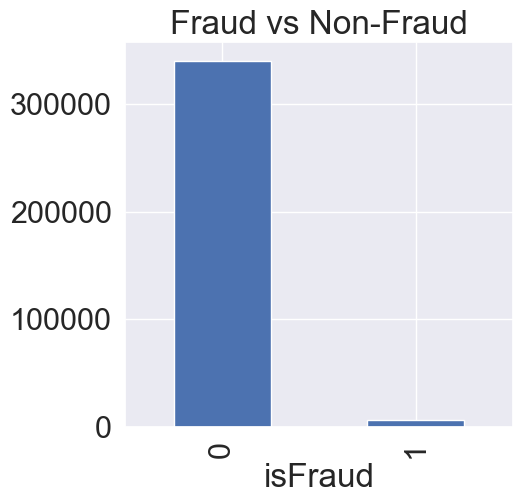

Fraud transactions:  (6942, 205)
Non-Fraud transactions:  (339970, 205)
Percentage of fraud transactions:  2.0010838483534727 %


In [548]:
# Plot the target value
plt.figure(figsize=(5, 5))
train['isFraud'].value_counts().plot.bar()
plt.title("Fraud vs Non-Fraud")
plt.show()

# It is an imbalanced dataset. We can see fraud value is 1 and non-fraud value is 0. Most of the transactions are non-fraud.

# Print the quantities of fraud and non-fraud transactions
fraud = train[train['isFraud'] == 1]
non_fraud = train[train['isFraud'] == 0]
print("Fraud transactions: ", fraud.shape)
print("Non-Fraud transactions: ", non_fraud.shape)

# Calculate the percentage of fraud transactions
percentage_fraud = (len(fraud) / len(train)) * 100
print("Percentage of fraud transactions: ", percentage_fraud, "%")

### 2.4. Feature Statistics and Feature Correlation

In [549]:
# Print the remaining features of train
print(train.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=205)


In [550]:
# Transaction Features
Transaction_features = [features for features in train.columns if 'Transaction' in features]
print("Transaction features:", Transaction_features)

Transaction features: ['TransactionID', 'TransactionDT', 'TransactionAmt']


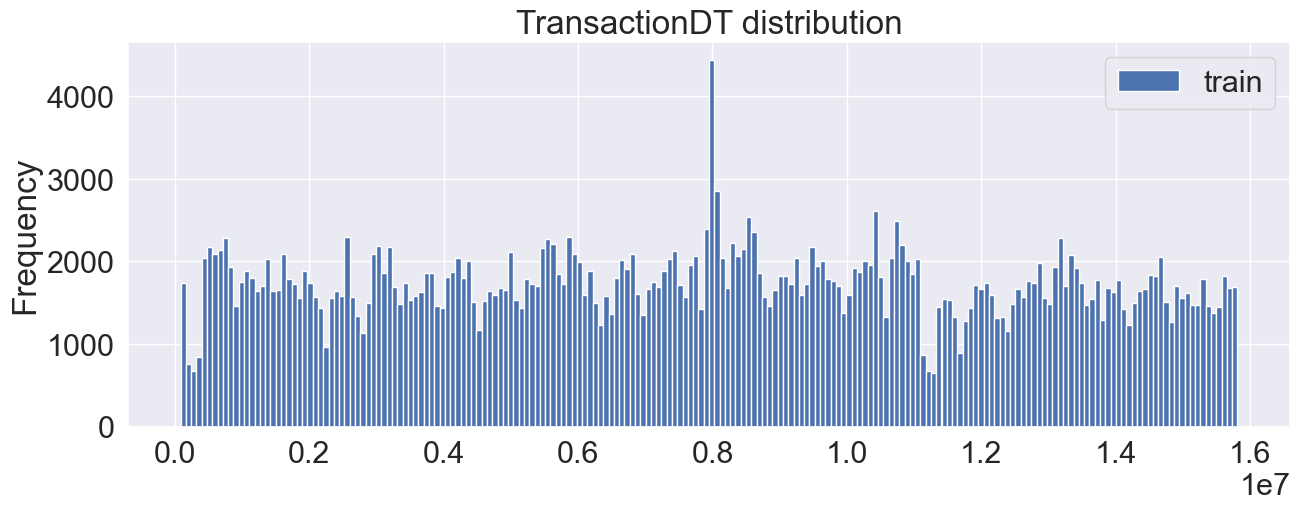

In [551]:
# TransactionID is not a useful feature, so we can drop it
# TransactionDT is the timedelta from a given reference datetime.
train['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='train', bins=200, title='TransactionDT distribution')
plt.legend()
plt.show()

<Axes: title={'center': 'Train TransactionAmt distribution'}, ylabel='Frequency'>

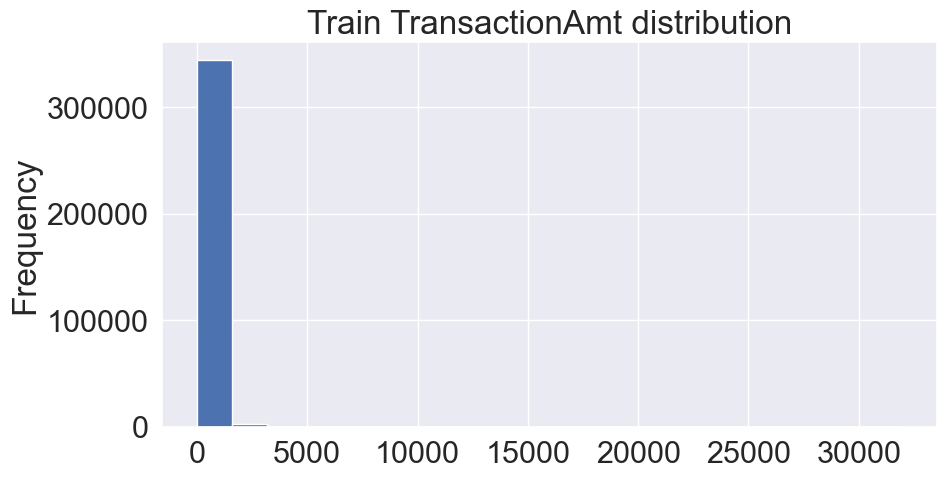

In [552]:
# TransactionAmt is the transaction payment amount in USD
train['TransactionAmt'].plot(kind='hist', figsize=(10, 5), label='test', bins=20, title='Train TransactionAmt distribution')

<Axes: title={'center': 'Correlation of Transaction Features'}>

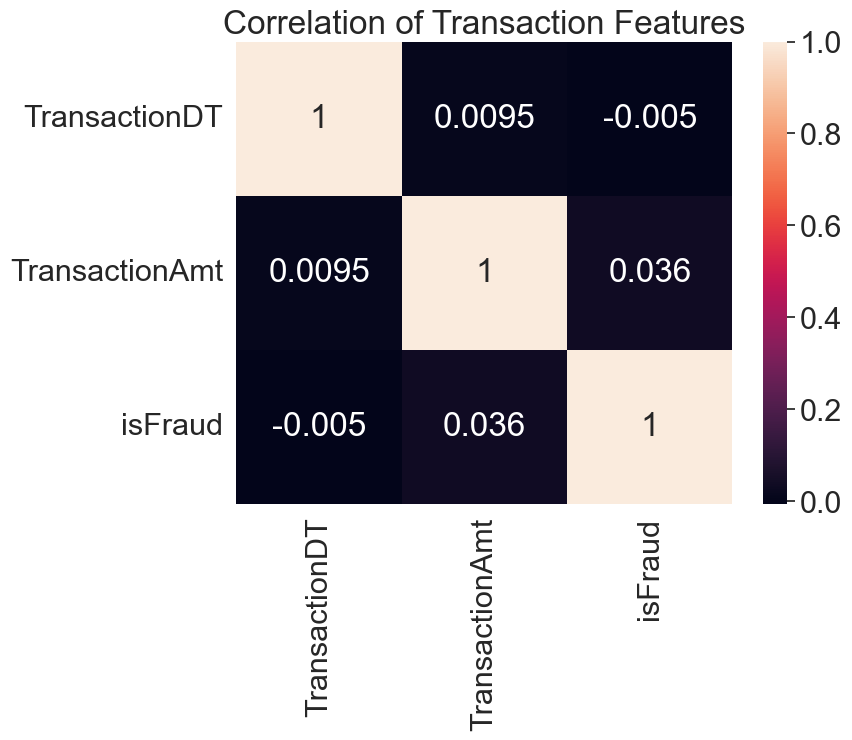

In [553]:
# Correlation of Transaction Features
correlation_Transaction_features = ['TransactionDT', 'TransactionAmt','isFraud']
ccorrelation_Transaction = train[correlation_Transaction_features].corr()
plt.subplots(figsize = (8, 6))
plt.title('Correlation of Transaction Features')
sns.heatmap(ccorrelation_Transaction,annot=True) 

In [554]:
# Remove the TransactionID, which is just for merging the data
train = train.drop(['TransactionID'], axis=1)

In [555]:
# Card Features
card_features = [features for features in train.columns if 'card' in features]
print("Card features:", card_features)

Card features: ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']


In [556]:
# for features in card_features:
#     plt.subplots(figsize = (15, 5))
#     print("total number of categories in this {} {} ".format(features, len(train[features].value_counts())))
#     train[features].value_counts().plot.bar()
#     plt.title(features)
#     plt.xticks(rotation=90)
#     plt.show()

In [557]:
# # Delete card4 and card6 from the card_features as they are categorical features
card_features.remove('card4')
card_features.remove('card6')

# Print the values of card4 and card6
print(train['card4'].value_counts())
print(train['card6'].value_counts())

card4
visa                231375
mastercard          113256
discover              2008
american express       273
Name: count, dtype: int64
card6
debit              290390
credit              56493
debit or credit        29
Name: count, dtype: int64


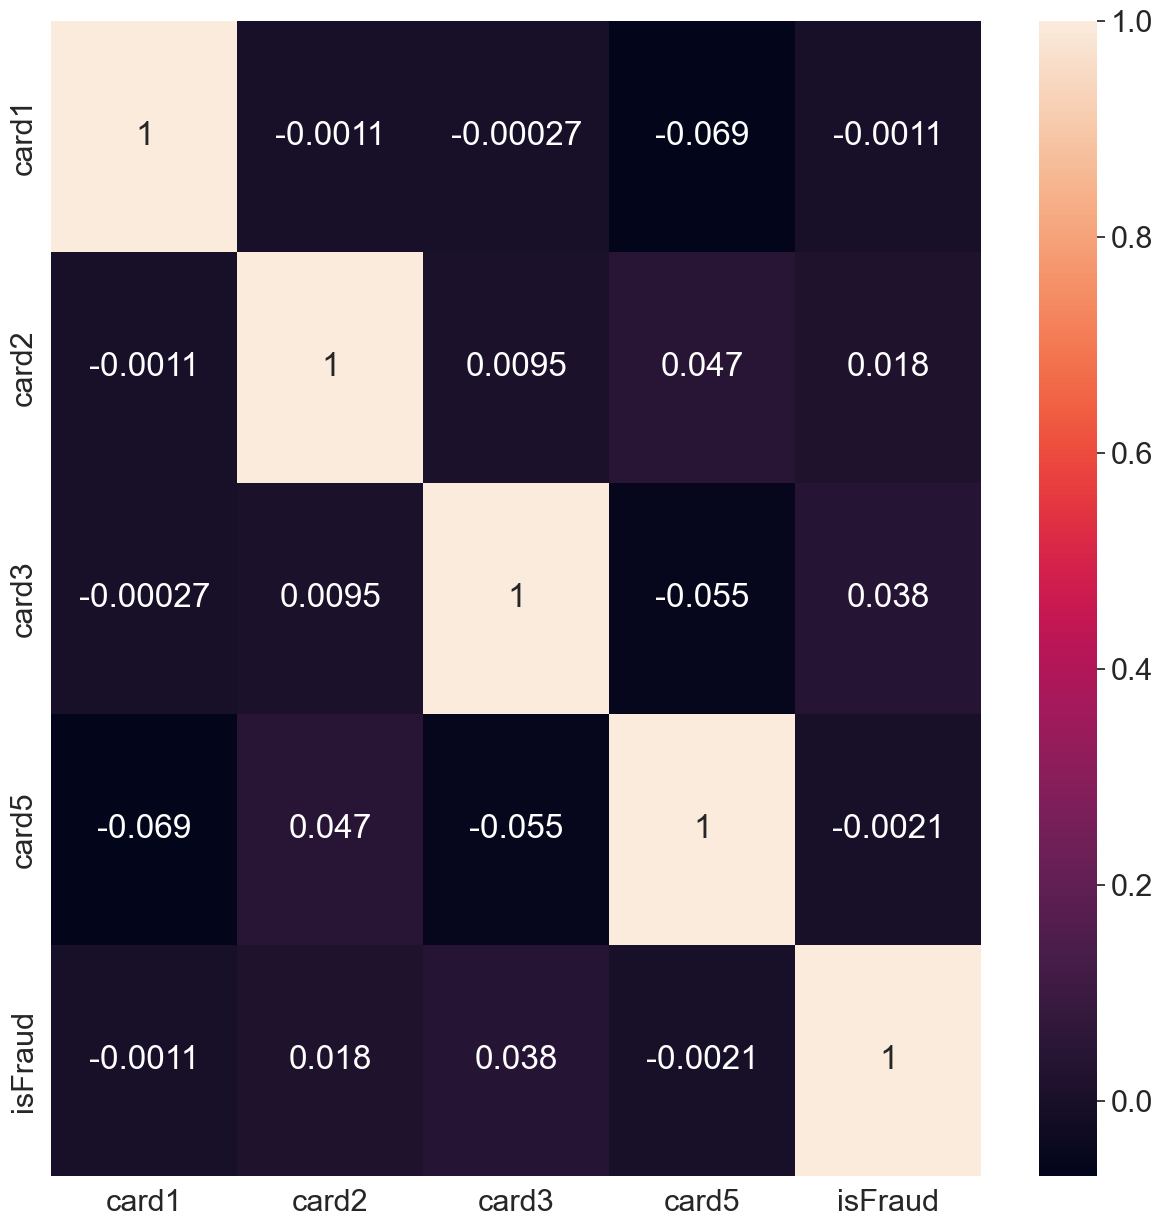

In [558]:
card_features += ['isFraud']
correlation_card = train[card_features].corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(correlation_card,annot=True) 
sns.set(font_scale=2)

In [559]:
# C Features
c_features = [features for features in train.columns if 'C' in features]
c_features.remove('ProductCD')
print("C features:", c_features)

C features: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


<Axes: >

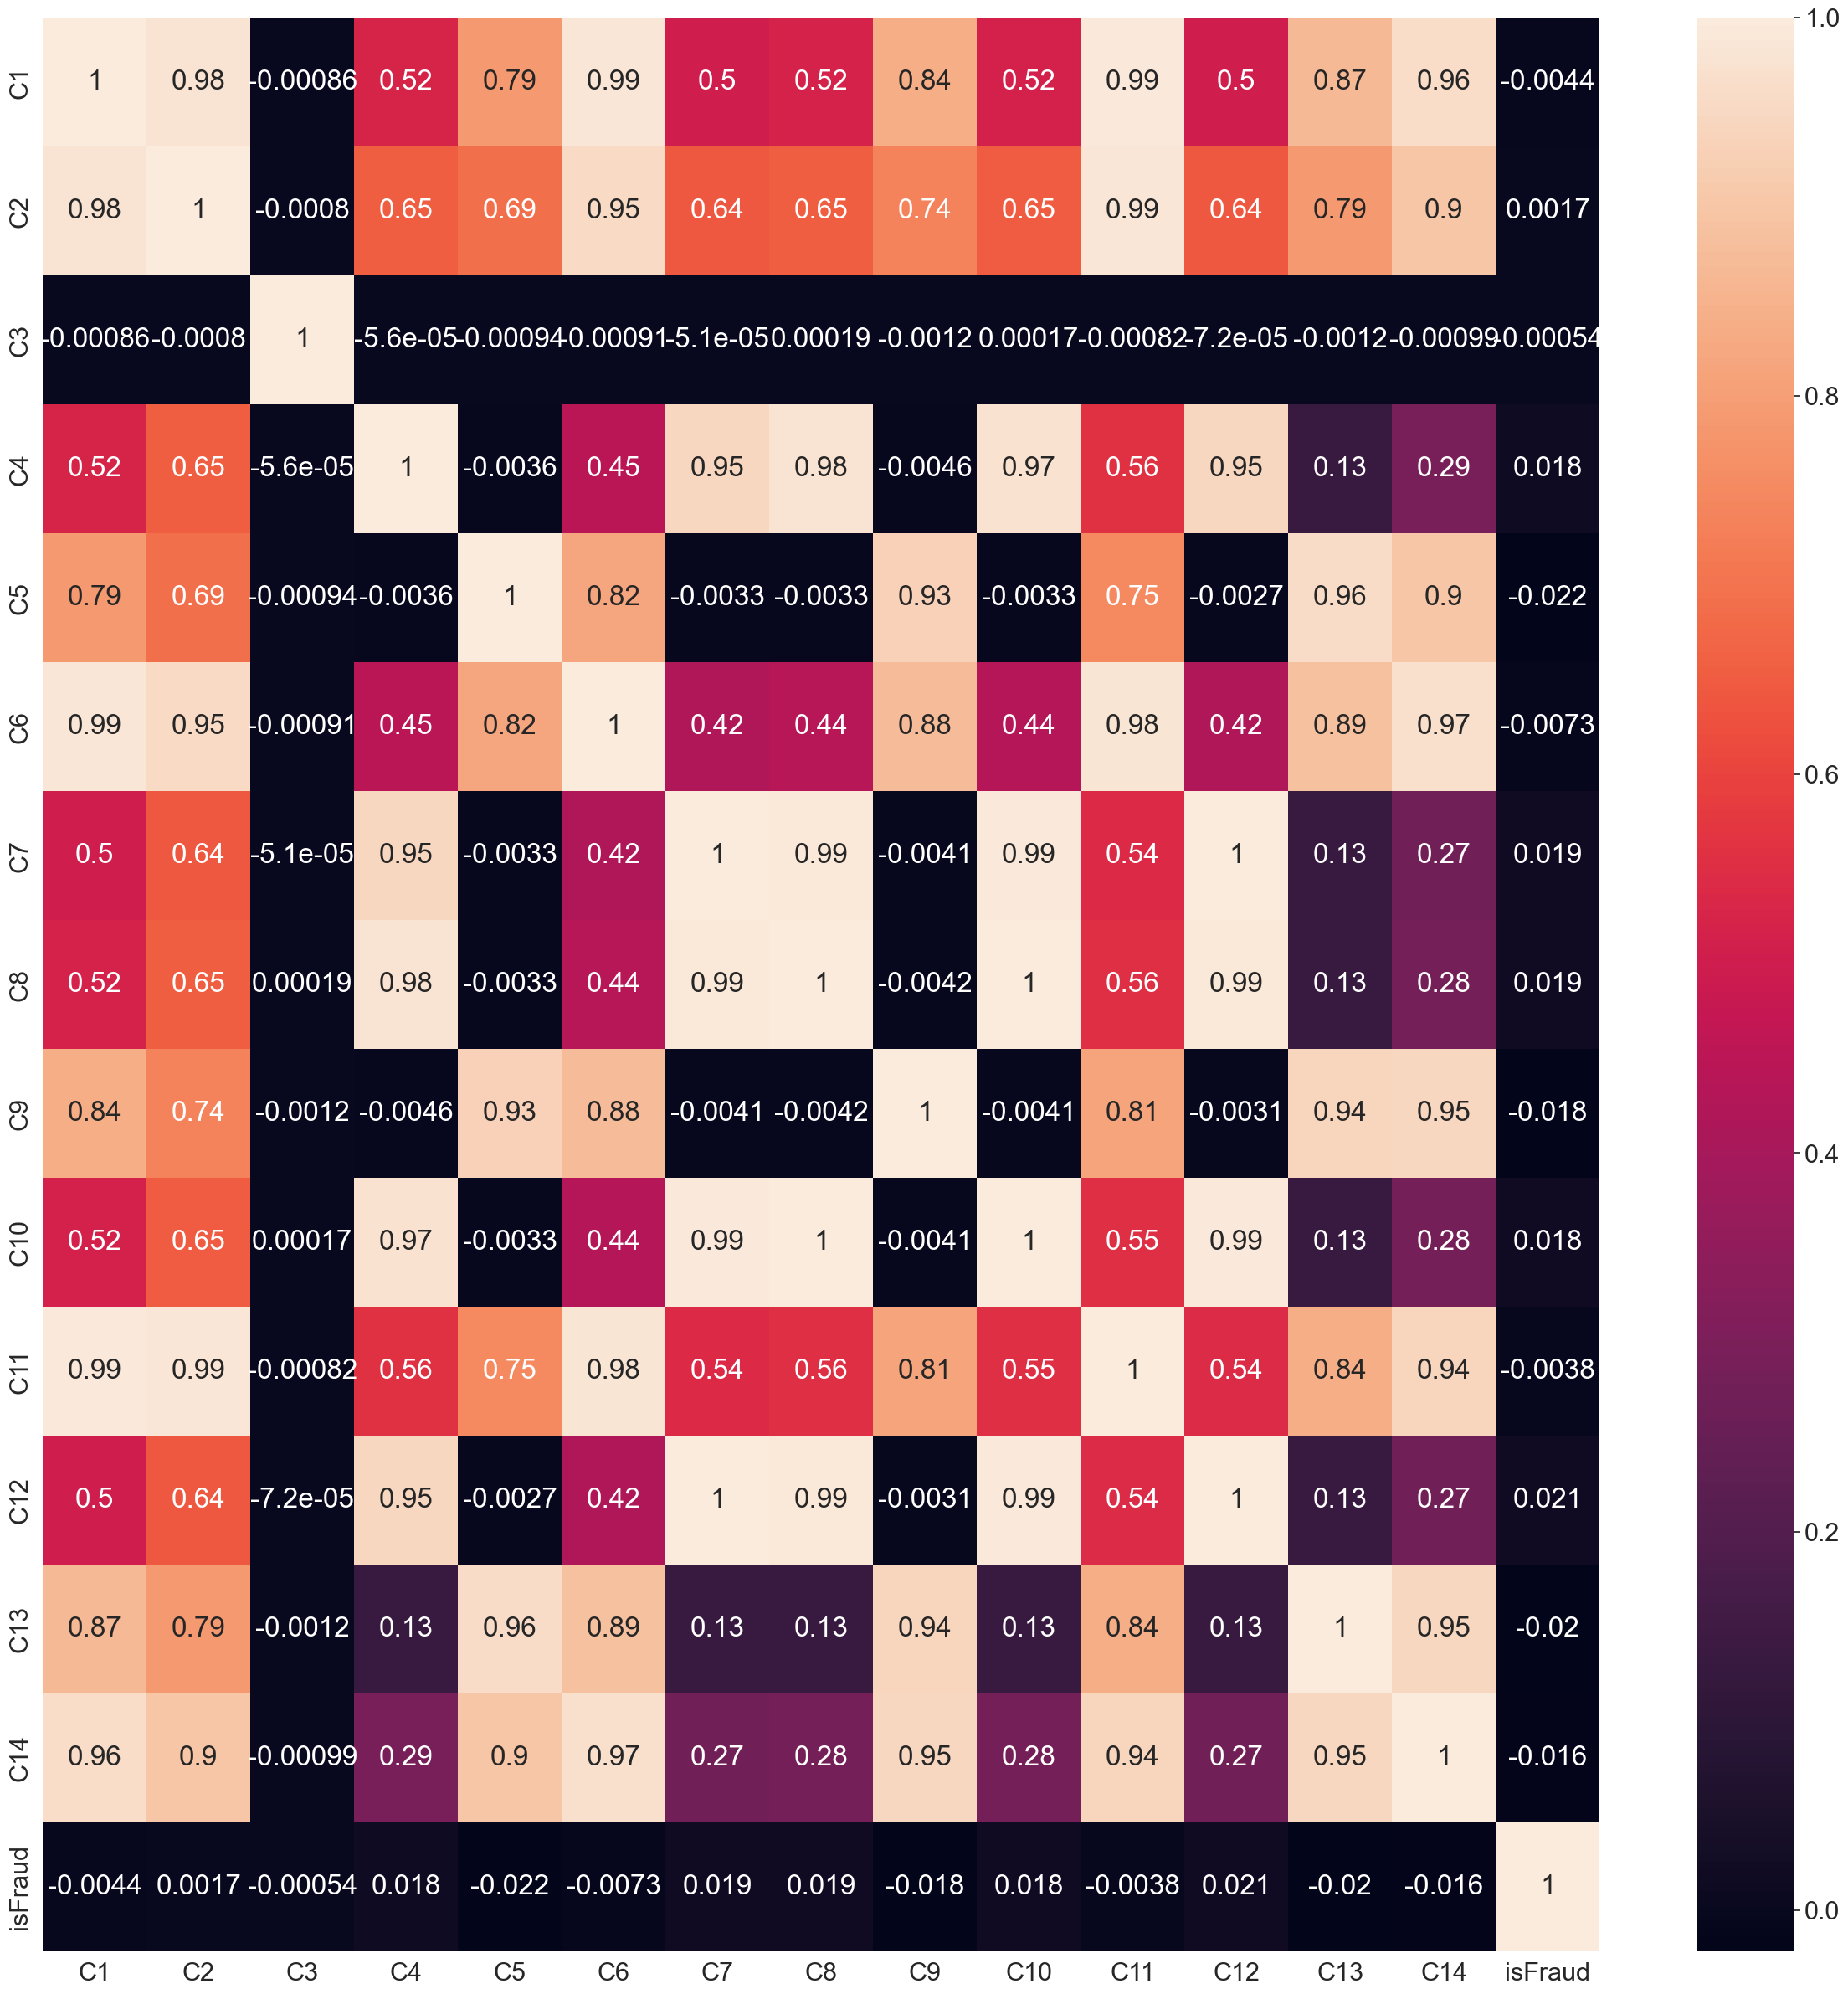

In [560]:
c_features += ['isFraud']
correlation_c = train[c_features].corr()
plt.subplots(figsize = (30, 30))
sns.heatmap(correlation_c,annot=True) 

In [561]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

new_c = correlation(correlation_c, 0.9)
print( "Threse features are highly correlated" + str(new_c))

Threse features are highly correlated{'C6', 'C2', 'C11', 'C7', 'C10', 'C13', 'C12', 'C9', 'C14', 'C8'}


D features: ['D1', 'D4', 'D10', 'D15', 'isFraud']


<Axes: >

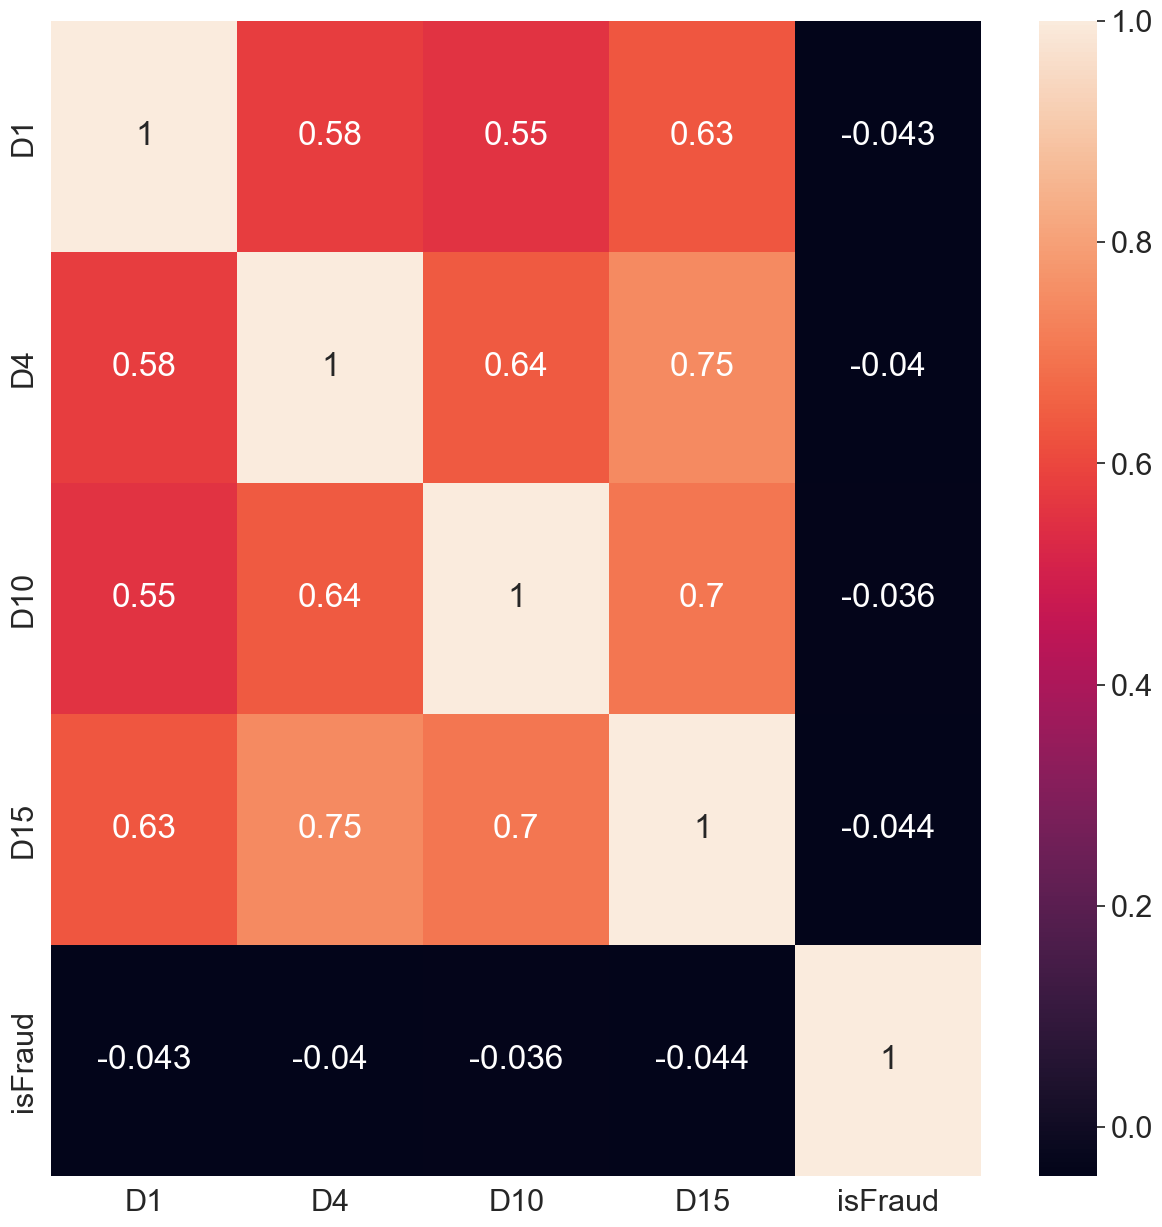

In [562]:
# D Features
D_features = [features for features in train.columns if 'D' in features]
D_features += ['isFraud']
D_features.remove('DeviceType')
D_features.remove('DeviceInfo')
D_features.remove('TransactionDT')
D_features.remove('ProductCD')

print("D features:", D_features)

correlation_D = train[D_features].corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(correlation_D,annot=True) 

In [563]:
new_D = correlation(correlation_D, 0.9)
print( "Threse features are highly correlated" + str(new_D))

Threse features are highly correlated{'isFraud'}


In [564]:
# V Features
V_features = [features for features in train.columns if 'V' in features]
print("V features:", V_features)
V_features += ['isFraud']

correlation_V = train[V_features].corr()
new_V = correlation(correlation_V, 0.9)
print( "Threse features are highly correlated" + str(new_V))

V features: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V2

In [565]:
# ID Features
ID_features = [features for features in train.columns if 'id' in features]
print("ID features:", ID_features)

# Print the highly correlated features
correlation_id = train[ID_features].corr()
new_id = correlation(correlation_id, 0.9)
print( "Threse features are highly correlated" + str(new_id))

ID features: []
Threse features are highly correlatedset()


In [566]:
# Device Features
device_features = [features for features in train.columns if 'Device' in features]
print("Device features:", device_features)

# Print some categories of the DeviceType and DeviceInfo
for f in device_features:
    print(feature)
    print(train[f].value_counts().head(5))

Device features: ['DeviceType', 'DeviceInfo']
DeviceInfo
DeviceType
Unknown    343433
desktop      2743
mobile        736
Name: count, dtype: int64
DeviceInfo
DeviceInfo
Unknown        344169
Windows          1549
iOS Device        296
MacOS             277
Trident/7.0       233
Name: count, dtype: int64


In [567]:
# Email Features
email_features = [features for features in train.columns if 'email' in features]
print("Email features:", email_features)

# P_emaildomain means purchaser email domain
# R_emaildomain means recipient email domain

# Print some categories of the P_emaildomain and R_emaildomain
for f in email_features:
    print(feature)
    print(train[f].value_counts().head(5))

Email features: ['P_emaildomain', 'R_emaildomain']
DeviceInfo
P_emaildomain
gmail.com        164310
yahoo.com         85100
aol.com           23137
anonymous.com     18397
hotmail.com       17536
Name: count, dtype: int64
DeviceInfo
R_emaildomain
Unknown          342338
gmail.com          1589
hotmail.com        1287
anonymous.com       739
yahoo.com           233
Name: count, dtype: int64


In [568]:
# M Features
M_features = [features for features in train.columns if 'M' in features]
print("M features:", M_features)

M features: ['M6']


In [569]:
# One hot encoding for the categorical features
train = pd.get_dummies(train, columns=categorical_features, drop_first=True)
print("train shape: ", train.shape)

train shape:  (346912, 488)


In [570]:
# Store the train and test data into csv file
train.to_csv("./merged_data/train.csv", index=False)

## 3. Data Preprecessing

In [594]:
# load the data
train = pd.read_csv("./merged_data/train.csv")

# Copy the data
data = train.copy()

# Split the data into X and y
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (346912, 487)
y shape:  (346912,)


### 3.1. Outlier Removal

In [597]:
# Mahalanobis Depth-based Outlier Detection

# Compute Mahalanobis Depth (inverse of Mahalanobis distance)
def mahalanobis_depth(X):
    cov_est = EmpiricalCovariance().fit(X)  # Estimate covariance matrix
    mahal_dist = cov_est.mahalanobis(X)  # Compute Mahalanobis distance
    depth_scores = - mahal_dist  # Depth is inverse of distance (larger values = more central points)
    return depth_scores

# Compute depth scores for each sample
depth_scores = mahalanobis_depth(X)

# Set threshold to remove the bottom 5% of data points with the lowest depth scores
threshold = np.percentile(depth_scores, 5)  # Lower depth = more likely to be an outlier
mask = depth_scores > threshold  # Keep only points with high depth scores

# Filter out the outliers from the dataset
X_iso_clean = X[mask]
y_iso_clean = y[mask]

print("X_iso_clean shape:", X_iso_clean.shape)
print("y_iso_clean shape:", y_iso_clean.shape)

X_iso_clean shape: (329566, 487)
y_iso_clean shape: (329566,)


### 3.2. Dealing with Imbalanced Data

In [573]:
# Ensure X_iso_clean and y_train are DataFrame and Series
if isinstance(X_iso_clean, np.ndarray):
    X_iso_clean = pd.DataFrame(X_iso_clean)  # Convert X to DataFrame

if isinstance(y_iso_clean, np.ndarray):
    y_iso_clean = pd.Series(y_iso_clean, name="isFraud")  # Convert y to Series

In [574]:
# Combine features (X_iso_clean) and labels (y_train) into a single DataFrame
df_train = pd.concat([X_iso_clean, y_iso_clean], axis=1)

# Separate fraudulent and non-fraudulent transactions
fraud = df_train[df_train['isFraud'] == 1]  # Fraudulent transactions
non_fraud = df_train[df_train['isFraud'] == 0]  # Non-fraudulent transactions

# Oversample fraudulent transactions (increase by 5 times)
fraud_oversampled = fraud.sample(n=len(fraud) * 5, replace=True, random_state=1)

# Combine oversampled fraud transactions with the original non-fraud transactions
df_balanced = pd.concat([non_fraud, fraud_oversampled])

# Split back into features (X) and labels (y)
X_train_bal = df_balanced.drop(columns=['isFraud'])
y_train_bal = df_balanced['isFraud']

X_iso_clean = X_train_bal
y_iso_clean = y_train_bal

In [575]:
# Recalculate the imbalance ratio
imbalance_ratio = len(y_iso_clean[y_iso_clean == 0]) / len(y_iso_clean[y_iso_clean == 1])
print("Imbalance ratio after oversampling: ", imbalance_ratio)

Imbalance ratio after oversampling:  11.150645772343722


In [576]:
# Drop TransactionDT
X_iso_clean = X_iso_clean.drop(['TransactionDT'], axis=1)

### 3.3. Data Standardization

In [577]:
# Standardize the dataset (zero mean, unit variance)
scaler = StandardScaler()
X_iso_clean = scaler.fit_transform(X_iso_clean)

### 3.4. Dimensionality Reduction

In [578]:
# Dimensionality reduction using Autoencoder into 20 dimensions

# Define the autoencoder model
input_layer = Input(shape=(X_iso_clean.shape[1],)) # Input layer
encoded = Dense(20, activation='relu')(input_layer) # Encoded layer
decoded = Dense(X_iso_clean.shape[1], activation='linear')(encoded) # Decoded layer

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
autoencoder.fit(X_iso_clean, X_iso_clean, epochs=30, batch_size=256, shuffle=True, validation_split=0.2)

# Create a new model that outputs the encoded layer
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_iso_clean)
print("X_encoded shape:", X_encoded.shape)

Epoch 1/30
1103/1103 [==============================] - 4s 3ms/step - loss: 0.2684 - val_loss: 0.2971
Epoch 2/30
1103/1103 [==============================] - 3s 2ms/step - loss: 0.2339 - val_loss: 0.2894
Epoch 3/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.2312 - val_loss: 0.2882
Epoch 4/30
1103/1103 [==============================] - 3s 2ms/step - loss: 0.2306 - val_loss: 0.2869
Epoch 5/30
1103/1103 [==============================] - 3s 2ms/step - loss: 0.2303 - val_loss: 0.2870
Epoch 6/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.2302 - val_loss: 0.2865
Epoch 7/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.2301 - val_loss: 0.2864
Epoch 8/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.2300 - val_loss: 0.2860
Epoch 9/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.2300 - val_loss: 0.2857
Epoch 10/30
1103/1103 [==============================] - 2s 2ms/step - loss: 0.229

### 3.5. Splitting the Training and Test Sets

In [579]:
# Split the cleaned dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_iso_clean, test_size=0.2, random_state=1)

In [580]:
# Save the data
np.savez_compressed("./processed_data/data.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [581]:
# Load the data
data = np.load("./processed_data/data.npz")
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

## 4. Models

### 4.1. Performance Analysis (Accuracy, Confusion Matrix, AUC)

In [582]:
def performance_analysis(y_test, y_pred):

    # Compute Accuracy
    acc = accuracy_score(y_test, y_pred)
    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Compute AUC Score
    auc = roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"AUC Score: {auc:.4f}")

### 4.2. Isolation Forest

Isolation Forest is an unsupervised anomaly detection algorithm that identifies outliers by isolating them from the majority of the data. The algorithm works by recursively partitioning the dataset using random feature selection and random split points. It builds multiple isolation trees, where each tree is constructed by selecting a feature at random and splitting it at a randomly chosen value within the feature range. This process continues recursively until all points are isolated. The key idea is that anomalies, being rare and having feature values that deviate significantly from normal data, tend to be isolated in fewer splits, leading to shorter average path lengths in the trees. The anomaly score for each data point is determined by computing its average path length across multiple trees; points with shorter paths are more likely to be anomalies. Isolation Forest is efficient, with a time complexity of **O(n log n)**, making it scalable for large datasets. It is also effective in high-dimensional spaces since it does not rely on distance-based calculations like k-NN. However, its performance may vary if feature correlations exist, as random splits may not always be optimal. Despite th|is, Isolation Forest is widely used in applications such as fraud detection, intrusion detection, and fault diagnosis due to its speed, scalability, and effectiveness in identifying anomalies without requiring labeled data.

In [583]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=1)
iso_forest.fit(X_train)

# Predict anomalies (Isolation Forest outputs 1 for normal and -1 for anomalies)
y_pred = iso_forest.predict(X_test)

# Convert -1 to 1 (fraud) and 1 to 0 (normal) to match the target labels
y_pred = [1 if i == -1 else 0 for i in y_pred]

# Evaluate the performance of Isolation Forest
print("Isolation Forest Performance:")
performance_analysis(y_test, y_pred)

Isolation Forest Performance:
Accuracy: 0.8958
Confusion Matrix:
[[62263  2514]
 [ 4841   941]]
AUC Score: 0.5620


### 4.3. Informer

Informer is an optimized Transformer model designed for **long sequence time-series forecasting (LSTF)**. Standard Transformers struggle with long sequences due to **quadratic complexity (O(n²))** in self-attention and high memory consumption. Informer overcomes these limitations by introducing **probSparse self-attention**, **self-attention distilling**, and a **causal convolution decoder**.

The **probSparse self-attention** mechanism improves efficiency by selecting only the most important query-key pairs, reducing computational complexity to **O(n log n)**. Instead of computing attention scores for all input points, it keeps only the top-k queries with the largest variance, ensuring a **sparse but informative attention distribution**. This significantly reduces redundancy and speeds up inference.

To further optimize memory usage, **self-attention distilling** compresses feature maps by down-sampling the attention outputs at each layer, retaining only the most important information. This hierarchical structure reduces computational overhead and improves generalization.

In [584]:
# Print the dataset
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (282235, 20)
y_train shape:  (282235,)
X_test shape:  (70559, 20)
y_test shape:  (70559,)


In [585]:
def create_sequences(X, y, seq_len):
    """
    Convert a 2D array (num_samples, input_size) into a 3D array (num_samples, seq_len, input_size)
    using a rolling window approach.
    
    Args:
        X (np.array): Input features of shape (num_samples, input_size).
        y (np.array): Labels of shape (num_samples,).
        seq_len (int): Length of the sequence for each sample.

    Returns:
        X_seq (np.array): Transformed feature set with shape (new_num_samples, seq_len, input_size).
        y_seq (np.array): Corresponding labels with shape (new_num_samples,).
    """
    num_samples = len(X) - seq_len  # Compute the number of valid samples
    X_seq = np.zeros((num_samples, seq_len, X.shape[1]))  # Create an empty array for X
    y_seq = np.zeros((num_samples,))  # Create an empty array for y
    
    for i in range(num_samples):
        X_seq[i] = X[i:i+seq_len]  # Take 60 consecutive rows as one sample
        y_seq[i] = y[i+seq_len]  # Take the label of the next time step
    
    return X_seq, y_seq

# Assume X_train, y_train, X_test, y_test already exist
seq_len = 60  # Each sample consists of 60 rows of data

# Process training data
X_train_transformed, y_train_transformed = create_sequences(X_train, y_train, seq_len)

# Process test data
X_test_transformed, y_test_transformed = create_sequences(X_test, y_test, seq_len)

# Output the transformed data shapes
print("X_train_transformed shape:", X_train_transformed.shape)  # Expected: (number of training samples, 60, 20)
print("y_train_transformed shape:", y_train_transformed.shape)  # Expected: (number of training samples,)
print("X_test_transformed shape:", X_test_transformed.shape)  # Expected: (number of test samples, 60, 20)
print("y_test_transformed shape:", y_test_transformed.shape)  # Expected: (number of test samples,)

# Assign transformed data back to original variables
X_train = X_train_transformed
y_train = y_train_transformed
X_test = X_test_transformed
y_test = y_test_transformed

X_train_transformed shape: (282175, 60, 20)
y_train_transformed shape: (282175,)
X_test_transformed shape: (70499, 60, 20)
y_test_transformed shape: (70499,)


In [586]:
# 1. Define Informer Encoder Layer
class InformerEncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super(InformerEncoderLayer, self).__init__()
        # Use PyTorch's built-in multi-head attention mechanism
        self.self_attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads, dropout=dropout)
        self.linear1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        
    def forward(self, src):
        # src shape: (seq_len, batch, d_model)
        attn_output, _ = self.self_attn(src, src, src)
        src = src + self.dropout1(attn_output)
        src = self.norm1(src)
        ff_output = self.linear2(self.dropout(F.relu(self.linear1(src))))
        src = src + self.dropout2(ff_output)
        src = self.norm2(src)
        return src

# 2. Define Informer Encoder (Stacked Encoder Layers)
class InformerEncoder(nn.Module):
    def __init__(self, encoder_layer, num_layers):
        super(InformerEncoder, self).__init__()
        self.layers = nn.ModuleList([encoder_layer for _ in range(num_layers)])
        
    def forward(self, src):
        for layer in self.layers:
            src = layer(src)
        return src

# 3. Define Informer Classifier
class InformerClassifier(nn.Module):
    def __init__(self, input_size, d_model, n_heads, d_ff, num_layers, num_classes, seq_len):
        super(InformerClassifier, self).__init__()
        # Project input features into d_model-dimensional space
        self.input_projection = nn.Linear(input_size, d_model)
        # Learnable positional encoding (Alternatively, use sinusoidal positional encoding)
        self.pos_embedding = nn.Parameter(torch.randn(seq_len, 1, d_model))
        encoder_layer = InformerEncoderLayer(d_model, n_heads, d_ff)
        self.encoder = InformerEncoder(encoder_layer, num_layers)
        # Classification head: maps encoded features to class predictions
        self.classifier = nn.Linear(d_model, num_classes)
        
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        # Transpose to (seq_len, batch, input_size)
        x = x.transpose(0, 1)
        # Input projection + positional encoding → (seq_len, batch, d_model)
        x = self.input_projection(x) + self.pos_embedding
        # Pass through encoder (shape remains (seq_len, batch, d_model))
        encoded = self.encoder(x)
        # Apply pooling (e.g., take the mean across all time steps) → (batch, d_model)
        pooled = encoded.mean(dim=0)
        # Classification output → (batch, num_classes)
        out = self.classifier(pooled)
        return out

# 4. Data Preparation (Example)
# Convert to tensor
X_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.long)
X_test_tensor = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.long)

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 5. Initialize Model and Training Setup
# Model hyperparameters
d_model = 64
n_heads = 4
d_ff = 128
num_layers = 2

model = InformerClassifier(
    input_size=input_size,
    d_model=d_model,
    n_heads=n_heads,
    d_ff=d_ff,
    num_layers=num_layers,
    num_classes=num_classes,
    seq_len=seq_len
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

# 6. Training Loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/5, Loss: 0.2864
Epoch 2/5, Loss: 0.2851
Epoch 3/5, Loss: 0.2850
Epoch 4/5, Loss: 0.2850
Epoch 5/5, Loss: 0.2850


In [587]:
# Testing & Evaluation
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        y_true.extend(batch_y.cpu().numpy())  # Convert tensor to list
        y_pred.extend(predicted.cpu().numpy())  # Convert tensor to list

# Call the performance analysis function
performance_analysis(y_true, y_pred)

Accuracy: 0.9180
Confusion Matrix:
[[64721     0]
 [ 5778     0]]
AUC Score: 0.5000


In [588]:
# Store the model
torch.save(model.state_dict(), "./models/informer_model.pth")

### 4.4. Time2Vec-Informer

In [ ]:
# # Time2Vec layer
# class Time2Vec(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(Time2Vec, self).__init__()
#         self.W = nn.Linear(input_dim, output_dim)
#         self.sinusoidal = nn.Parameter(torch.randn(output_dim), requires_grad=True)

#     def forward(self, x):
#         v_i = self.W(x)
#         sin_i = torch.sin(v_i + self.sinusoidal)
#         return torch.cat([v_i, sin_i], dim=-1)

# # Weighted cross entropy loss function
# def weighted_cross_entropy_loss(preds, targets, weight=None):
#     loss_fn = nn.CrossEntropyLoss(weight=weight)
#     return loss_fn(preds, targets)

# # Initialize model
# seq_len = 96  
# label_len = 48
# pred_len = 24
# enc_in = 10  # Characteristic number
# dec_in = enc_in
# c_out = 2  # Output categories (normal and fraud)

# model = Informer(
#     enc_in=enc_in,
#     dec_in=dec_in,
#     c_out=c_out,
#     seq_len=seq_len,
#     label_len=label_len,
#     pred_len=pred_len,
#     d_model=512
# )

# time2vec = Time2Vec(input_dim=1, output_dim=enc_in//2)  # Time feature dimension adjustment

# # Loss function weight set, assuming fraud_label_weight is the weight of the fraud class
# weight = torch.tensor([1., fraud_label_weight])

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# # Training loop
# for epoch in range(epochs):
#     for batch_x, batch_y in train_loader:  # Assume that train_loader is ready
#         time_feature = batch_x[:, :, :1]  # Suppose the first column is time feature
#         transformed_time_feature = time2vec(time_feature)
#         batch_x = torch.cat([transformed_time_feature, batch_x[:, :, 1:]], dim=-1)
        
#         optimizer.zero_grad()
#         outputs = model(batch_x)
#         loss = weighted_cross_entropy_loss(outputs, batch_y, weight=weight)
#         loss.backward()
#         optimizer.step()

### 4.5. Fusion Model

### 4.6. Comparison

## 5. Next Steps


### **1. Model Optimization and Hyperparameter Tuning**
#### **1.1 Isolation Forest Optimization**
- Fine-tune key hyperparameters:
  - `n_estimators`: Number of base estimators (trees).
  - `max_samples`: The fraction of dataset samples used to train each tree.
  - `contamination`: Adjust based on estimated fraud ratio.
- Perform cross-validation to find the best hyperparameters.
- Evaluate model performance on different subsets of features.

#### **1.2 Informer Model Optimization**
- Fine-tune the following parameters using grid search or Bayesian optimization:
  - `hidden_size`, `num_heads`, `d_ff`, `dropout_rate`, etc.
  - `seq_len` (length of input sequence) to ensure optimal contextual learning.
- Implement **learning rate scheduling** and **early stopping** to stabilize training.
- Train the model with different batch sizes and optimizer configurations (e.g., Adam, AdamW).
- Enlarge the training epoch to find best local minimium by using acceleration of GPU.


### **2. Incorporating Time2Vec for Handling Irregular Time Intervals**
#### **2.1 Implementing Time2Vec**
- Add a **Time2Vec encoding layer** before feeding transaction timestamps into the model.
- Experiment with both **sinusoidal-based** and **learnable weight-based** Time2Vec formulations.
- Conduct ablation studies to compare the model performance **with and without Time2Vec**.

#### **2.2 Evaluating Impact of Time2Vec**
- Compare performance metrics (ROC-AUC, PR-AUC, and F1-score) before and after adding Time2Vec.
- Visualize learned time encodings to ensure the model captures meaningful temporal dependencies.


### **3. Model Fusion: Combining Isolation Forest & Informer**
#### **3.1 Late Fusion Strategy**
- Combine Isolation Forest and Informer predictions using:
  - **Stacking ensemble** (training a meta-classifier on their outputs).
  - **Weighted averaging** based on each model’s confidence.

#### **3.2 Comparative Analysis**
- Evaluate performance differences between:
  - **Informer-only** vs. **Informer + Isolation Forest**.
  - **Feature fusion** vs. **decision-level fusion**.